In [ ]:
import os
import json

def merge_jsonl_files(directory):
    merged_data = {}

    for filename in os.listdir(directory):
        if filename.endswith(".jsonl"):
            file_path = os.path.join(directory, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                merged_data[filename] = [json.loads(line) for line in file]

    return merged_data

# Example usage
directory_path = "/content/"  # Change this to your directory
merged_dict = merge_jsonl_files(directory_path)

# Save the merged data to a new JSON file
output_file = "merged_output.json"
with open(output_file, "w", encoding="utf-8") as outfile:
    json.dump(merged_dict, outfile, indent=4)

print(f"Merged data saved to {output_file}")

Merged data saved to merged_output.json


In [ ]:
#output_file = "/content/drive/MyDrive/PAN2024_data_rankings.json"
with open(output_file, "r", encoding="utf-8") as file:
    merged_data = json.load(file)


In [ ]:
import os
import json
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def merge_jsonl_files(directory):
    merged_data = {}

    for filename in os.listdir(directory):
        if filename.endswith(".jsonl"):
            file_path = os.path.join(directory, filename)

            with open(file_path, "r", encoding="utf-8") as file:
                merged_data[filename] = [json.loads(line) for line in file]

    return merged_data

def get_log_rank_for_word(text, word, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        logits = outputs.logits[:, -1, :].squeeze(0)
        probs = torch.nn.functional.log_softmax(logits, dim=-1)

    word_id = tokenizer.encode(word, add_special_tokens=False)[0]
    sorted_probs, sorted_indices = torch.sort(probs, descending=True)
    rank = (sorted_indices == word_id).nonzero(as_tuple=True)[0].item()

    top_word_id = sorted_indices[0].item()
    top_word = tokenizer.decode([top_word_id])

    #print(f"Phrase: {text}\nTop word: {top_word}\nRank word: {word} (Rank: {rank})\n")

    return rank

def sliding_window_log_rank(text, model, tokenizer, window_size=30):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    ranks = []

    for i in range(0, len(tokens) - window_size, window_size):
        sub_text = tokenizer.decode(tokens[i:i+window_size])
        if i + window_size >= len(tokens):
            break
        rank_word = tokenizer.decode([tokens[i + window_size]]) if i + window_size < len(tokens) else ""

        rank = get_log_rank_for_word(sub_text, rank_word, model, tokenizer)
        ranks.append((rank_word, rank))

    return ranks

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage
directory_path = "/content/"  # Change this to your directory
merged_dict = merge_jsonl_files(directory_path)

model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
df.to_csv('PAN 2024 Log Rank Comps.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
"""
output_file = "/content/drive/MyDrive/PAN2024_data_rankings.json"
ranks = {}
keys = list(merged_data.keys())
for key in keys:
  author = merged_data[key]
  ranks[key] = {}
  print(key,'started!')
  for text in author:
    id = ''.join(text['id'].split('/')[1:])
    ranks[key][id] = sliding_window_log_rank(text['text'],model,tokenizer)
    with open(output_file, "w", encoding="utf-8") as outfile:
      json.dump(ranks, outfile, indent=4)
  print(key,'done!')
    """


mistralai-mixtral-8x7b-instruct-v0.1.jsonl started!
mistralai-mixtral-8x7b-instruct-v0.1.jsonl done!
human.jsonl started!
human.jsonl done!
mistralai-mistral-7b-instruct-v0.2.jsonl started!
mistralai-mistral-7b-instruct-v0.2.jsonl done!
bigscience-bloomz-7b1.jsonl started!
bigscience-bloomz-7b1.jsonl done!
meta-llama-llama-2-7b-chat-hf.jsonl started!
meta-llama-llama-2-7b-chat-hf.jsonl done!
gemini-pro.jsonl started!
gemini-pro.jsonl done!
gpt-4-turbo-preview.jsonl started!
gpt-4-turbo-preview.jsonl done!
meta-llama-llama-2-70b-chat-hf.jsonl started!
meta-llama-llama-2-70b-chat-hf.jsonl done!
text-bison-002.jsonl started!
text-bison-002.jsonl done!
vicgalle-gpt2-open-instruct-v1.jsonl started!
vicgalle-gpt2-open-instruct-v1.jsonl done!
chavinlo-alpaca-13b.jsonl started!
chavinlo-alpaca-13b.jsonl done!
gpt-3.5-turbo-0125.jsonl started!
gpt-3.5-turbo-0125.jsonl done!
qwen-qwen1.5-72b-chat-8bit.jsonl started!
qwen-qwen1.5-72b-chat-8bit.jsonl done!
alpaca-7b.jsonl started!
alpaca-7b.jsonl 

In [ ]:
avgs = {}
for key in merged_data.keys():
  avgs[key] = {}
  for article in merged_data[key]:
    lst = [thing[1] for thing in merged_data[key][article]]
    try:
      percent_0 = lst.count(0)/len(lst)
    except:
      percent_0 = 0
    avgs[key][article] = (np.mean(lst),np.median(lst),percent_0)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import pandas as pd
pd.DataFrame.from_dict(avgs)

mistralai-mixtral-8x7b-instruct-v0.1.jsonl  \
news-2021-01-01-2021-12-31-bideninaugurationart...  (110.65789473684211, 2.5, 0.42105263157894735)   
news-2021-01-01-2021-12-31-bideninaugurationart...   (7.809523809523809, 1.0, 0.47619047619047616)   
news-2021-01-01-2021-12-31-bideninaugurationart...    (78.05882352941177, 1.0, 0.3235294117647059)   
news-2021-01-01-2021-12-31-bideninaugurationart...  (243.70833333333334, 3.5, 0.20833333333333334)   
news-2021-01-01-2021-12-31-bideninaugurationart...                              (71.32, 2.0, 0.28)   
...                                                                                            ...   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...              (376.375, 1.0, 0.4583333333333333)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...   (40.45454545454545, 2.0, 0.36363636363636365)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...                  (25.533333333333335, 3.0, 0.3)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...                          (206.625, 1.5, 0.3125)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...   (574.9545454545455, 1.0, 0.45454545454545453)   

                                                                                      human.jsonl  \
news-2021-01-01-2021-12-31-bideninaugurationart...                  (528.2333333333333, 1.5, 0.4)   
news-2021-01-01-2021-12-31-bideninaugurationart...  (49.588235294117645, 1.0, 0.4117647058823529)   
news-2021-01-01-2021-12-31-bideninaugurationart...                              (50.36, 2.0, 0.2)   
news-2021-01-01-2021-12-31-bideninaugurationart...  (30.666666666666668, 6.0, 0.2916666666666667)   
news-2021-01-01-2021-12-31-bideninaugurationart...  (127.02857142857142, 0.0, 0.5428571428571428)   
...                                                                                           ...   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (76.82352941176471, 2.0, 0.29411764705882354)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (36.65384615384615, 1.0, 0.38461538461538464)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (60.714285714285715, 1.0, 0.4642857142857143)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...   (65.10526315789474, 5.0, 0.3684210526315789)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (15.380952380952381, 0.0, 0.6190476190476191)   

                                                          mistralai-mistral-7b-instruct-v0.2.jsonl  \
news-2021-01-01-2021-12-31-bideninaugurationart...    (33.13636363636363, 0.0, 0.5454545454545454)   
news-2021-01-01-2021-12-31-bideninaugurationart...    (515.8148148148148, 1.0, 0.4074074074074074)   
news-2021-01-01-2021-12-31-bideninaugurationart...    (67.05405405405405, 1.0, 0.4594594594594595)   
news-2021-01-01-2021-12-31-bideninaugurationart...   (2.1333333333333333, 0.0, 0.6666666666666666)   
news-2021-01-01-2021-12-31-bideninaugurationart...   (40.31428571428572, 1.0, 0.45714285714285713)   
...                                                                                            ...   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...    (722.6818181818181, 5.5, 0.2727272727272727)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...   (252.47368421052633, 1.0, 0.3684210526315789)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (157.59259259259258, 3.0, 0.48148148148148145)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...  (411.65384615384613, 2.5, 0.38461538461538464)   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...   (44.689655172413794, 0.0, 0.5862068965517241)   

                                                                      bigscience-bloomz-7b1.jsonl  \
news-2021-01-01-2021-12-31-bideninaugurationart...                               (27.0, 1.0, 0.5)   
news-2021-01-01-2021-12-31-bideninaugurationart...   (764.8421052631579, 2.0, 0.2631578947368421)   
news-2021-01-01-2021-12-31-bideninaugurationart...                           (416.625, 9.0

In [ ]:
import numpy as np
lst = [thing[1] for thing in merged_data['mistralai-mixtral-8x7b-instruct-v0.1.jsonl']['news-2021-01-01-2021-12-31-kamalaharrisvicepresidentart-000']]

print(np.mean(lst))
print(np.median(lst))
print(lst.count(0)/len(lst))

130.42307692307693
4.0
0.2692307692307692


In [ ]:
import pandas as pd

# Define column names (Extract from JSONL file names)
column_names = [
    "ID",
    "mistralai-mixtral-8x7b-instruct-v0.1", "human", "mistralai-mistral-7b-instruct-v0.2",
    "bigscience-bloomz-7b1", "meta-llama-llama-2-7b-chat-hf", "gemini-pro",
    "gpt-4-turbo-preview", "meta-llama-llama-2-70b-chat-hf", "text-bison-002",
    "vicgalle-gpt2-open-instruct-v1", "chavinlo-alpaca-13b", "gpt-3.5-turbo-0125",
    "qwen-qwen1.5-72b-chat-8bit", "alpaca-7b"
]

for indx,name in enumerate(column_names):
  if indx == 0:
    continue
  column_names[indx] = name+'.jsonl'


# Convert data to DataFrame
df = pd.DataFrame.from_dict(avgs)

# Expand the tuple columns into (x, y, z)
for col in column_names[1:]:  # Skip "ID"
    df[[f"{col}_avg", f"{col}_median", f"{col}_0%"]] = pd.DataFrame(df[col].tolist(), index=df.index)

# Drop original tuple columns
df.drop(columns=column_names[1:], inplace=True)

# Show DataFrame
print(df)


                                                    mistralai-mixtral-8x7b-instruct-v0.1.jsonl_avg  \
news-2021-01-01-2021-12-31-bideninaugurationart...                                      110.657895   
news-2021-01-01-2021-12-31-bideninaugurationart...                                        7.809524   
news-2021-01-01-2021-12-31-bideninaugurationart...                                       78.058824   
news-2021-01-01-2021-12-31-bideninaugurationart...                                      243.708333   
news-2021-01-01-2021-12-31-bideninaugurationart...                                       71.320000   
...                                                                                            ...   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...                                      376.375000   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...                                       40.454545   
news-2021-01-01-2021-12-31-wyominggabbypetitoar...                                

In [ ]:
avg_names = [name for name in df.columns if 'avg' in name]
med_names = [name for name in df.columns if 'median' in name]
zero_names = [name for name in df.columns if '0%' in name]

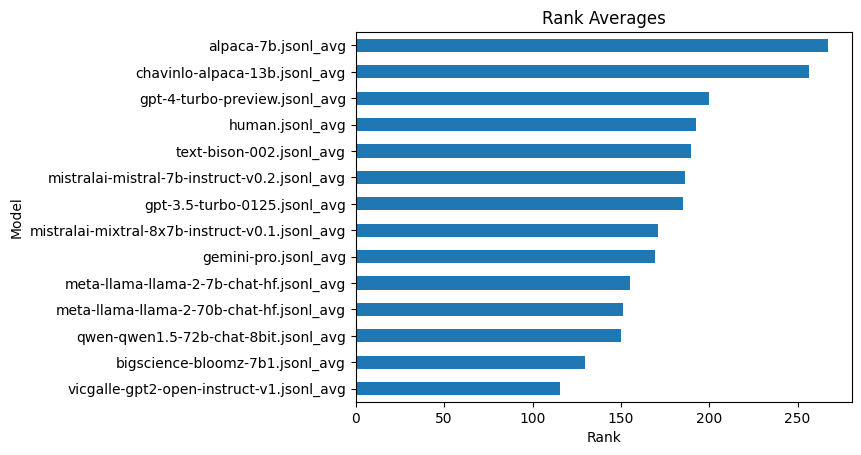

In [ ]:
import matplotlib.pyplot as plt
df[avg_names].mean().sort_values().plot(kind='barh')
plt.title('Rank Averages')
plt.ylabel('Model')
plt.xlabel('Rank')
plt.show()

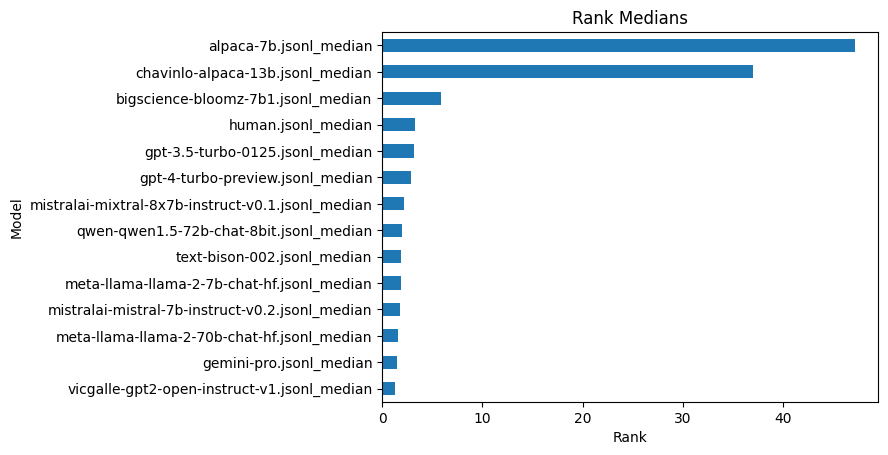

In [ ]:
import matplotlib.pyplot as plt
df[med_names].mean().sort_values().plot(kind='barh')
plt.title('Rank Medians')
plt.ylabel('Model')
plt.xlabel('Rank')
plt.show()

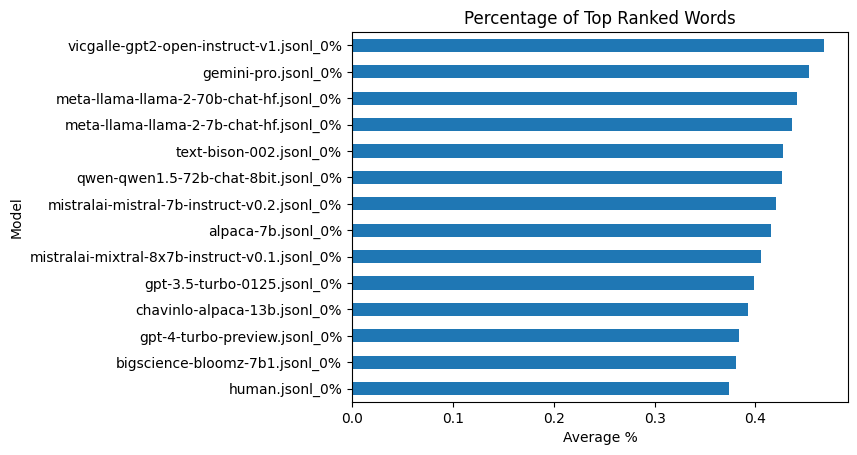

In [ ]:
import matplotlib.pyplot as plt
df[zero_names].mean().sort_values().plot(kind='barh')
plt.title('Percentage of Top Ranked Words')
plt.ylabel('Model')
plt.xlabel('Average %')
plt.show()

In [ ]:
merged_data['human.jsonl'][0]['text']

'Inaugural Address by President Joseph R. Biden, Jr.\n\nChief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans.\n\nThis is America\'s day.\n\nThis is democracy\'s day.\n\nA day of history and hope.\n\nOf renewal and resolve.\n\nThrough a crucible for the ages America has been tested anew and America has risen to the challenge.\n\nToday, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy.\n\nThe will of the people has been heard and the will of the people has been heeded.\n\nWe have learned again that democracy is precious.\n\nDemocracy is fragile.\n\nAnd at this hour, my friends, democracy has prevailed.\n\nSo now, on this hallowed ground where just days ago violence sought to shake this Capitol\'s very foundation, we come together as one nation, under God, indivisible, to carry out the peaceful transfer of power as we have for more than two cent

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 Large Model & Tokenizer
model_name = "gpt2-large"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()  # Set model to evaluation mode

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def generate_story(context, max_length=200, temperature=0.7, top_k=50):
    """Generate continuation of the story based on the provided context."""
    inputs = tokenizer(context, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=len(inputs["input_ids"][0]) + max_length,  # Limit output size
            temperature=temperature,  # Adjust randomness
            top_k=top_k,  # Reduce likelihood of less probable words
            pad_token_id=tokenizer.eos_token_id,  # Ensure proper stopping
        )

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Interactive Story Writing Loop
#context = input("Enter your story's starting sentence: ")
print("\nGenerating story...\n")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Generating story...



In [ ]:
generate_story(
    ' '.join(merged_data['human.jsonl'][0]['text'].split()[:30]),
    max_length=200,
    temperature=0.7,
    top_k=5000
)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `5000` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


'Inaugural Address by President Joseph R. Biden, Jr. Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, distinguished guests, and my fellow Americans. This is an extraordinary day for our country. It is an extraordinary day for our democracy. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our democracy. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. It is an extraordinary day for our Constitution. It is an extraordinary day for our people. 